In [1]:
# Sample dataset to use
from sklearn.datasets import load_diabetes
import pandas as pd

# Load the dataset
diabetes = load_diabetes()

# Create a DataFrame from the dataset
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target  # Add the target variable

In [2]:
# Example to use as frame of reference for accuracy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler


# Split the data into features (X) and target variable (y)
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the scaled testing set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 53.85344583676593


In [398]:
# Custom model
import pandas as pd
import numpy as np
class CustomModel:
    def __init__(self):
        self.model = None
        self.errors = []
    
    def fit(self, X_train, y_train, n):
        w = []
        # Convert DataFrames to NumPy arrays
        X_train_array = X_train.to_numpy()
        y_train_array = y_train.to_numpy().transpose()

        # To initialize w: For each column of X, I want to find the average. 
        # Then, find the average for y (1 dimmensional). For each x, divide 
        # y by x, and make that a matrix. 
        
        feature_means = np.mean(X_train_array, axis=0)
        y_mean = np.mean(y_train_array)
        
        # Calculate the ratio of each feature to the mean of y
        w = np.divide(feature_means, y_mean)
        prev_error = np.inf
        # TODO: Add code to optimize w    
        for i in range(n):
            y_pred = np.dot(X_train_array, w)

            error = y_pred - y_train_array
            self.errors.append(np.mean(np.abs(error)))
            # Update weights

            # gradient = np.tile(error, (1, X.shape[1]))
            gradient = .001 * np.dot(X_train_array.transpose(), error)

            w -= gradient  # Update weights using gradient descent

            prev_error = np.mean(error)
            
        self.model = w

    def predict(self, X_test):
        # Convert DataFrame to NumPy array
        X_test_array = X_test.to_numpy()
        
        # Perform prediction: X_test * w
        y_pred = np.dot(X_test_array, self.model)
        
        return y_pred


In [399]:
# Call model and train. Obtain accuracy
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

custom_model = CustomModel()
custom_model.fit(X_train, y_train, n=5000)
y_pred = custom_model.predict(X_test)

In [400]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [401]:
rmse

167.20608926732493

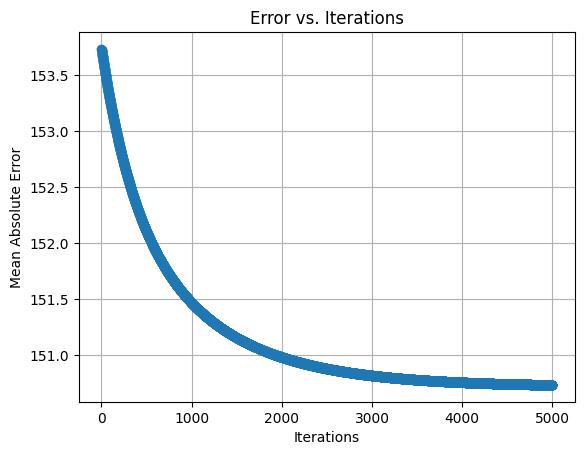

In [402]:
import matplotlib.pyplot as plt

plt.plot(range(len(custom_model.errors)), custom_model.errors, marker='o')
plt.title('Error vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Mean Absolute Error')
plt.grid(True)
plt.show()